In [1]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
trans = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

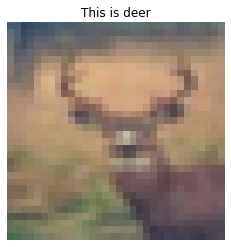

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
i = random.randint(0, x_train.shape[0]-1)
cat = trans[y_train[i][0]]
plt.title("This is {}".format(cat))
plt.axis("off")
plt.imshow(x_train[i])

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
model = Sequential()
# 3 * 3 * 3(一個filter) * 64 + 64 = 1792
model.add(Conv2D(64, 3,
                 padding="same",
                 activation="relu",
                 input_shape=(32, 32, 3)))
model.add(MaxPooling2D())
# 3 * 3 * 64(一個filter) * 128 + 128 = 73856
model.add(Conv2D(128, 3,
                 padding="same",
                 activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(256, 3,
                 padding="same",
                 activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 256)         0         


In [6]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [7]:
from keras.utils.np_utils import to_categorical
x_train_norm = x_train / 255
x_test_norm = x_test / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_test[0])
print(y_test_cat[0])

[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [8]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
checkpoint = ModelCheckpoint("cnn.h5", save_best_only=True)
earlystop = EarlyStopping(patience=3, restore_best_weights=True)
model.fit(x_train_norm, 
          y_train_cat,
          batch_size=200,
          epochs=100,
          validation_split=0.1,
          callbacks=[checkpoint, earlystop],
          verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 45000 samples, validate on 5000 samples
Epoch 1/100





 - 17s - loss: 1.6112 - acc: 0.4104 - val_loss: 1.2395 - val_acc: 0.5550
Epoch 2/100
 - 3s - loss: 1.1596 - acc: 0.5880 - val_loss: 0.9866 - val_acc: 0.6554
Epoch 3/100
 - 3s - loss: 0.9577 - acc: 0.6627 - val_loss: 0.8556 - val_acc: 0.7022
Epoch 4/100
 - 3s - loss: 0.8295 - acc: 0.7098 - val_loss: 0.8730 - val_acc: 0.6934
Epoch 5/100
 - 3s - loss: 0.7215 - acc: 0.7465 - val_loss: 0.7103 - val_acc: 0.7538
Epoch 6/100
 - 3s - loss: 0.6379 - acc: 0.7765 - val_loss: 0.7372 - val_acc: 0.7482
Epoch 7/100
 - 3s - loss: 0.5684 - acc: 0.8001 - val_loss: 0.6936 - val_acc: 0.7658
Epoch 8/100
 - 3s - loss: 0.4973 - acc: 0.8262 - val_loss: 0.7327 - val_acc: 0.7598
Epoch 9/100
 - 3s - loss: 0.4272 - acc: 0.8501 - val_loss: 0.6868 - val_acc: 0.7756
Epoch 10/100
 - 3s - loss: 0.3783 - acc: 0.8676 - val_loss: 0.6816 - val_acc: 0.7828
Epoch 1

In [9]:
model.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 1s 84us/step


[0.7270049204826355, 0.7673]

In [0]:
pre = model.predict_classes(x_test_norm)
# (10000, 1)和(10000, )是兩回事
y_test_reshape = y_test.reshape(-1)

In [21]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
i = ["{}(正確)".format(i) for i in trans]
c = ["{}(預測)".format(i) for i in trans]
mat = confusion_matrix(y_test_reshape, pre)
convert = []
for row in mat:
    r = np.array(row) / sum(row) * 100
    r = list(map(lambda x:"{}%".format(round(x, 2)), r))
    convert.append(r)
pd.DataFrame(convert,
             index=i,
             columns=c)

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),85.6%,0.5%,3.4%,1.5%,1.3%,1.0%,0.7%,0.6%,3.6%,1.8%
automobile(正確),2.8%,85.9%,0.8%,1.1%,0.2%,0.2%,0.5%,0.3%,2.7%,5.5%
bird(正確),6.7%,0.1%,64.0%,5.6%,7.7%,6.6%,5.5%,2.7%,0.8%,0.3%
cat(正確),2.6%,0.4%,6.2%,58.4%,6.3%,17.5%,4.3%,2.1%,0.9%,1.3%
deer(正確),2.1%,0.2%,5.5%,6.2%,75.0%,2.9%,3.0%,4.4%,0.6%,0.1%
dog(正確),1.1%,0.4%,3.1%,14.4%,4.0%,72.4%,1.3%,2.6%,0.4%,0.3%
frog(正確),0.6%,0.3%,3.9%,6.3%,3.7%,2.4%,81.3%,0.3%,0.8%,0.4%
horse(正確),1.6%,0.1%,3.4%,2.9%,6.6%,6.1%,0.2%,78.2%,0.3%,0.6%
ship(正確),6.7%,2.1%,1.2%,0.8%,0.5%,0.6%,0.4%,0.2%,86.5%,1.0%
truck(正確),5.3%,5.8%,1.0%,1.8%,0.4%,0.8%,1.0%,1.3%,2.6%,80.0%


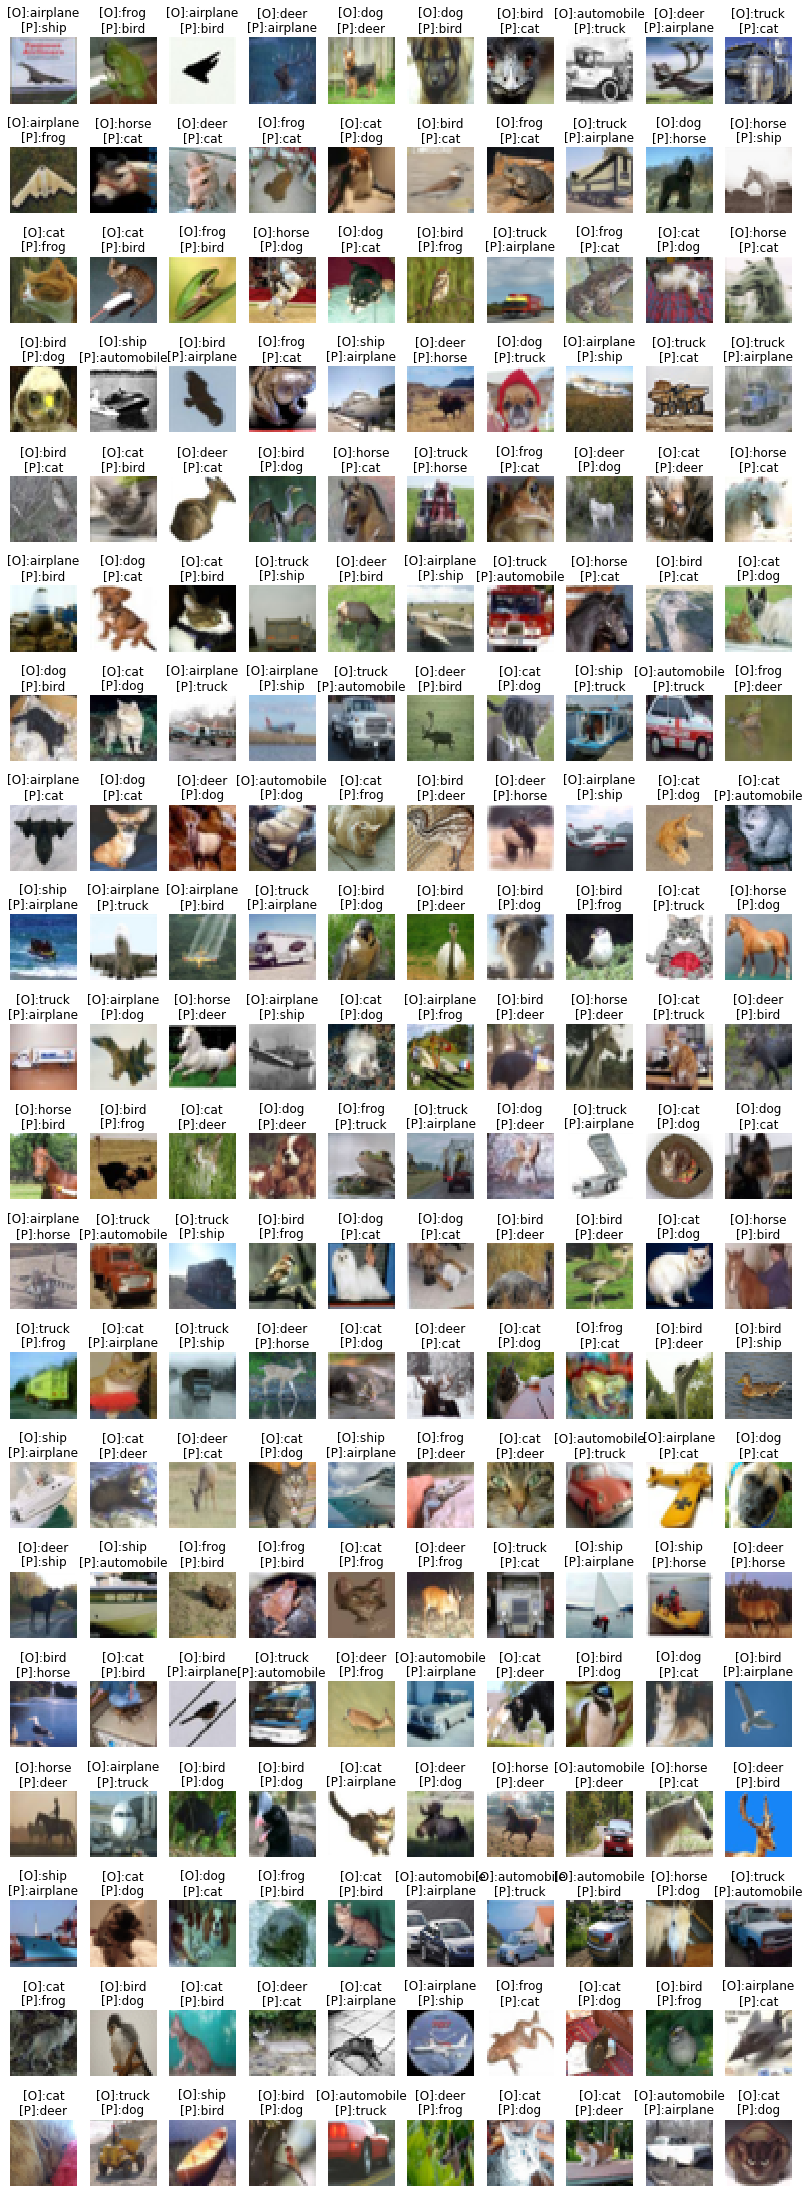

In [20]:
import numpy as np
# np: !=來比較每個位置的相等
# nonzero: 找到所有不為0的位置
# [類似list] -> 把所有東西一次拿給你
idx = np.nonzero(pre != y_test_reshape)[0][:200]

false_label = y_test_reshape[idx]
false_pre = pre[idx]
false_img = x_test[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(14, 42))

false_collection = zip(false_label, false_pre, false_img)
# 得到每一個: (index, (false_label, pre, img))
for i, (l, p, img) in enumerate(false_collection):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[l], trans[p])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)

請輸入檔案位址:cifar1.png
機率最高的: 0
是 airplane 的機率: 0.9999044
是 bird 的機率: 8.9113564e-05
是 automobile 的機率: 6.0049324e-06
是 ship 的機率: 2.2427012e-07
是 cat 的機率: 1.6766184e-07
是 truck 的機率: 8.329185e-08
是 frog 的機率: 3.619783e-09
是 dog 的機率: 2.4967892e-09
是 deer 的機率: 1.5922133e-09
是 horse 的機率: 6.673364e-12


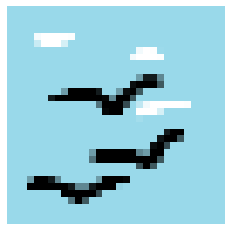

In [23]:

# sorted([("Amy", 5), ("Carol", 4), ("Bob", 3)],
#       key=lambda t:t[1])
from keras.preprocessing.image import load_img
fp = input("請輸入檔案位址:")
img = load_img(fp, target_size=(32, 32)).convert("RGB")
# 批次是第一個維度, 如果你是100張: (100, 32, 32, 3)
img_np = np.array(img).reshape(1, 32, 32, 3) / 255
ans = model.predict_classes(img_np)[0]
print("機率最高的:", ans)
pre = model.predict(img_np)[0]
z = zip(list(range(10)), pre)
for i, p in sorted(z, key=lambda x:x[1], reverse=True):
    print("是", trans[i], "的機率:", p)
plt.axis("off")
plt.imshow(img)